In [1]:
# importación de librerias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import squarify as sq

In [2]:
# Path de datos y su lectura
path_log_limpio = r"C:\Users\DELL\Desktop\logs\bases_datos\log_4_test_output.csv"
log_data = pd.read_csv(path_log_limpio)

In [3]:
#informacion de los datos
log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fecha           9134 non-null   object
 1   hora            9134 non-null   object
 2   codigo_defecto  9134 non-null   object
 3   alerta          9134 non-null   object
 4   especificacion  9134 non-null   object
dtypes: object(5)
memory usage: 356.9+ KB


In [4]:
#interfaz de tabla dinamica (hacer clic en "open""log_data")
log_data

,fecha,hora,codigo_defecto,alerta,especificacion
0,22/08/2005,04:13:10,0930,NORMAL,One Board is completed
1,22/08/2005,04:13:10,0930,NORMAL,One Board is completed
2,22/08/2005,04:13:11,0930,NORMAL,One Board is completed
3,22/08/2005,04:13:11,0938,NORMAL,Reserved Information Message 7
4,22/08/2005,04:13:11,0930,NORMAL,One Board is completed
...,...,...,...,...,...
9129,22/08/2007,08:53:31,0930,NORMAL,One Board is completed
9130,22/08/2007,08:53:33,0938,NORMAL,Reserved Information Message 7
9131,22/08/2007,08:53:38,0930,NORMAL,One Board is completed
9132,22/08/2007,08:53:38,0930,NORMAL,One Board is completed


In [5]:
#copia de seguridad
data = log_data.copy(deep= True)
# Cambiamos los formatos de fecha
data['fecha'] = pd.to_datetime(data['fecha'], format='%d/%m/%Y')
data['hora'] = pd.to_timedelta(data['hora'])
data.head(5)

,fecha,hora,codigo_defecto,alerta,especificacion
0,2005-08-22,0 days 04:13:10,0930,NORMAL,One Board is completed
1,2005-08-22,0 days 04:13:10,0930,NORMAL,One Board is completed
2,2005-08-22,0 days 04:13:11,0930,NORMAL,One Board is completed
3,2005-08-22,0 days 04:13:11,0938,NORMAL,Reserved Information Message 7
4,2005-08-22,0 days 04:13:11,0930,NORMAL,One Board is completed


# Exploración cuantitativa

Basado en la informacion veamos cuantos registros tenemos de:
- Tablillas por año.
- Cuantos diferentes codigos tenemos.
- Cuantas alertas tenemos de cada tipo.
- Cuentas difeterentes especificaciones tenemos.

In [6]:
#tablillas por año
data[data["fecha"] == pd.to_datetime("2005-08-22")].__len__()


1297

In [7]:
# Cuantos codigos tenemos de cada uno
cd= data["codigo_defecto"].value_counts()
cd =pd.DataFrame(data={'Codigo': cd.index, 'Cantidad': cd.values})
cd = cd[cd["Codigo"] != "0930"]
cd.T

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
Codigo,0938,fe22,fe21,ff12,fe23,fe24,5611,0110,0111,ff11,...,aa0b,1000,5012,a133,5804,4803,e200,aa19,0011,5803
Cantidad,1539,647,559,558,480,81,60,57,57,57,...,2,2,2,2,2,2,1,1,1,1


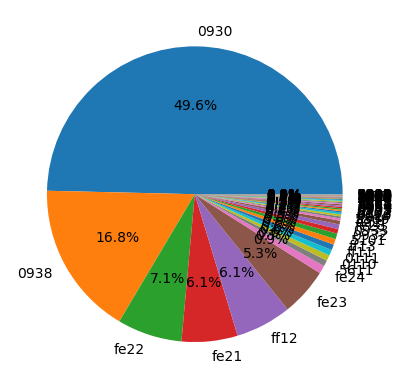

In [8]:
# Datos
grupos =data["codigo_defecto"].value_counts().index
valor =data["codigo_defecto"].value_counts().values

# Pie chart
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos , autopct = '%1.1f%%')
plt.show()

[1539  647  559  558  480   81   60   57   57   57   57   56   46   46
   38   23   20   20   18   14   14   14   14   13   13   12   11   11
   10]


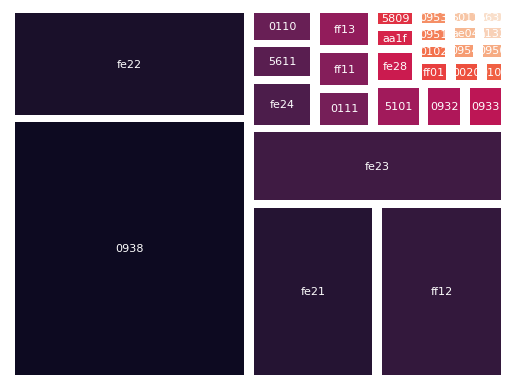

In [9]:
# Datos de muestra
grupos =data["codigo_defecto"].value_counts().index
valor =data["codigo_defecto"].value_counts().values
values = valor[1:30]
labels =  grupos[1:30]
print(values)

# Treemap
sq.plot(sizes = values, label = labels,
              pad = .6,
              text_kwargs = {'fontsize': 8, 'color': 'white' },
              color = sns.color_palette("rocket", len(values)))

# Eliminar los ejes:
plt.axis("off")

plt.show()

In [10]:
# cuantas alertas de cada tipo tenemos
pd.DataFrame( data = {"Alerta" : data["alerta"].value_counts().index[1:],
                      "Cantidad" :  data["alerta"].value_counts().values[1:] ,
                       })

,Alerta,Cantidad
0,WARNING,290
1,EMER,28
2,FREEZE,5


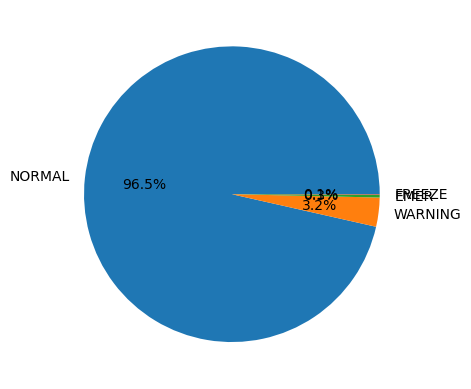

In [11]:
# Datos
grupos =data["alerta"].value_counts().index
valor =data["alerta"].value_counts().values

# Pie chart
fig, ax = plt.subplots()
ax.pie(valor, labels = grupos , autopct = '%1.1f%%')
plt.show()

In [13]:
# Filtros avanzados
# muestra los registros de un rango de fecha
# y un tipo especifico de alerta ademas de un codigo especifico
data_filtrada_2005_2006 = data[
    (data['fecha'] >= pd.to_datetime('2005-01-01')) &
      (data['fecha'] <=pd.to_datetime('2006-01-01')) &
      #(data["codigo_defecto"]== "0938") &
      (data["alerta"] != "NORMAL")]
print(data_filtrada_2005_2006.__len__())
data_filtrada_2005_2006

134


,fecha,hora,codigo_defecto,alerta,especificacion
96,2005-08-22,0 days 05:04:17,5633,WARNING,Head14 pick up the edge of Part 34-14626-of Fe...
97,2005-08-22,0 days 05:04:17,5633,WARNING,Head13 pick up the edge of Part 34-14626-of Fe...
98,2005-08-22,0 days 05:04:17,5633,WARNING,Head15 pick up the edge of Part 34-14626-of Fe...
99,2005-08-22,0 days 05:04:18,5101,WARNING,Head12 Feeder R15 Part 34-14626-The retry coun...
100,2005-08-22,0 days 05:04:18,5101,WARNING,Head14 Feeder R15 Part 34-14626-The retry coun...
...,...,...,...,...,...
1084,2005-08-22,0 days 18:10:39,0951,WARNING,The teaching box was disabled at the rear.
1089,2005-08-22,0 days 20:29:38,3094,FREEZE,StationR3 Board never cleared the Work sensor.
1090,2005-08-22,0 days 22:01:19,0020,EMER,Front door is open.
1105,2005-08-22,0 days 22:01:31,3094,FREEZE,StationR3 Board never cleared the Work sensor.
